In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from matplotlib.pyplot import figure
from scipy.stats.stats import pearsonr


In [83]:
data = pd.read_csv('Kelompok 4 Netflix Shows.csv')
B, K = data.shape
print('Baris = ', B, ', Kolom = ', K)
data.tail(10)


Baris =  7787 , Kolom =  12


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


kesimpulan yang bisa dilihat
1. year reales
2. country
3. listed in ( genre)
4. type (tv show and movie)


In [15]:
#menghapus kolom director karena banyak null
del data['director']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
cast            7069 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
rating          7780 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
description     7787 non-null object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


In [17]:
d = data.dropna()

In [18]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 7785
Data columns (total 11 columns):
show_id         6643 non-null object
type            6643 non-null object
title           6643 non-null object
cast            6643 non-null object
country         6643 non-null object
date_added      6643 non-null object
release_year    6643 non-null int64
rating          6643 non-null object
duration        6643 non-null object
listed_in       6643 non-null object
description     6643 non-null object
dtypes: int64(1), object(10)
memory usage: 622.8+ KB


In [19]:
d.duplicated().sum()

0

In [20]:
print(d.shape)
d.head()

(6643, 11)


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
# Trimming : IQR
Q1 = d.quantile(0.25)
Q3 = d.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # Menghitung jumlah data setelah di trim dengan IQR

release_year    5.0
dtype: float64


In [22]:
datanetflix = d[~((d<(Q1-1.5*IQR))|(d>(Q3+1.5*IQR))).any(axis=1)]
datanetflix.shape # data setelah di cek outlier

(5940, 11)

In [23]:
d.shape # data sebelum cek outlier

(6643, 11)

In [24]:
datanetflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [25]:
datanetflix.describe(include='all')

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5940,5940,5940,5940,5940,5940,5940.000000,5940,5940,5940,5940
unique,5940,2,5940,5775,581,1474,NaN,14,184,425,5935
top,s2497,Movie,Fire in the Blood,David Attenborough,United States,"October 1, 2018",NaN,TV-MA,1 Season,Stand-Up Comedy,When Elastigirl gets recruited for a high-prof...
freq,1,4135,1,17,1958,62,NaN,2368,1143,274,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,2016.056734,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.401561,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


dari 4403 data terdapat 2 tipe , 339 director, 4290 cast, 523 country,283 list,

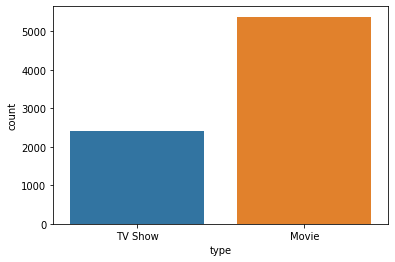

In [26]:
s = sns.countplot(x = "type", data = data) 

#kalo pake data yg belum di hapus nullnya movie lebih banyak

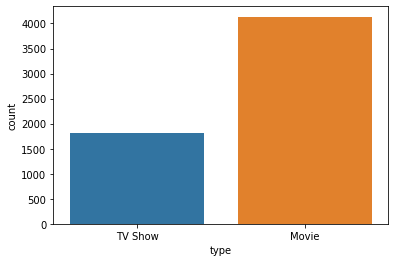

In [27]:
s = sns.countplot(x = "type", data = datanetflix) 


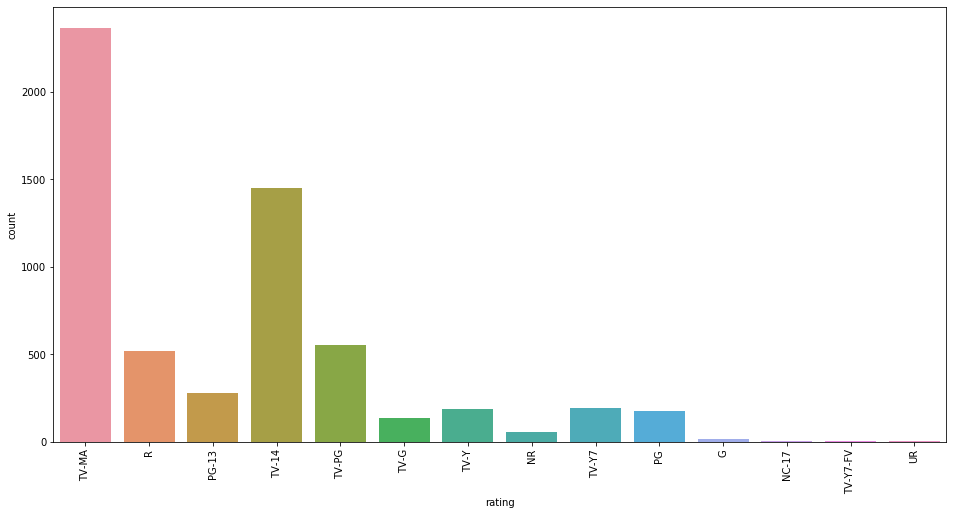

In [29]:
plt.figure(figsize=(16,8))
rating = sns.countplot(x = "rating", data = datanetflix )
rating.set_xticklabels(rating.get_xticklabels(), rotation=90)
print()

#rating terbanyak berasal dari rating TV-MA


In [38]:
datanetflix.groupby('rating').type.value_counts()

rating    type   
G         Movie        14
NC-17     Movie         3
NR        Movie        52
          TV Show       3
PG        Movie       177
PG-13     Movie       277
R         Movie       518
          TV Show       1
TV-14     Movie       951
          TV Show     501
TV-G      Movie        81
          TV Show      54
TV-MA     Movie      1557
          TV Show     811
TV-PG     Movie       351
          TV Show     202
TV-Y      TV Show     115
          Movie        74
TV-Y7     TV Show     117
          Movie        73
TV-Y7-FV  Movie         3
          TV Show       1
UR        Movie         4
Name: type, dtype: int64

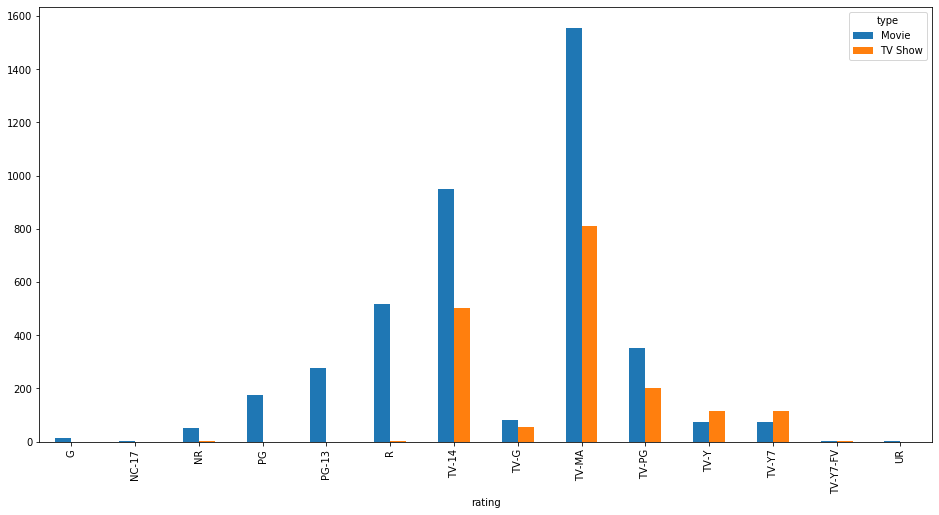

In [39]:
pd.crosstab(datanetflix.rating, datanetflix.type).plot(kind='bar',figsize=(16,8))

Text(0.5, 1.0, 'top genre')

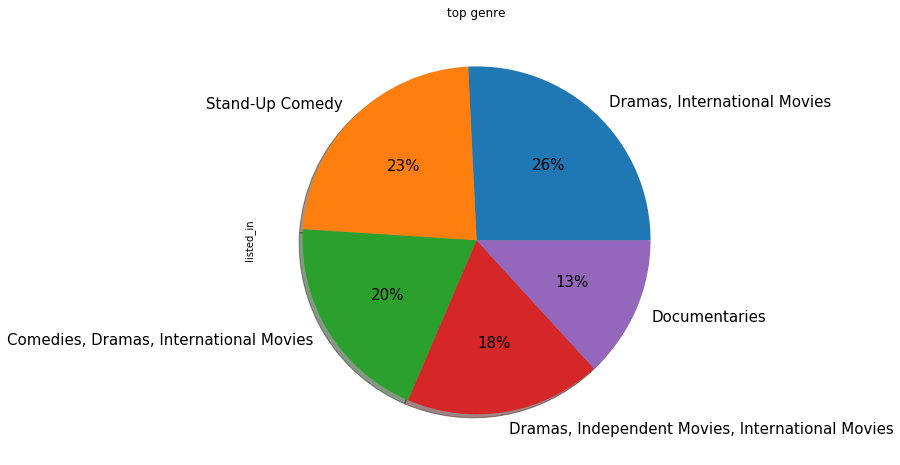

In [40]:
genre = datanetflix.groupby(datanetflix['listed_in'])['listed_in'].count().sort_values(ascending = False).head(5)
plt.figure(figsize=(12,8))
plt.subplot()
genre.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("top genre")

In [58]:
genre=datanetflix['listed_in'].value_counts()[:10]
genre

Stand-Up Comedy                                     274
Dramas, International Movies                        274
Comedies, Dramas, International Movies              211
Dramas, Independent Movies, International Movies    201
Documentaries                                       157
Comedies, International Movies                      143
Kids' TV                                            137
Children & Family Movies, Comedies                  135
Dramas, International Movies, Romantic Movies       124
Comedies, International Movies, Romantic Movies     122
Name: listed_in, dtype: int64

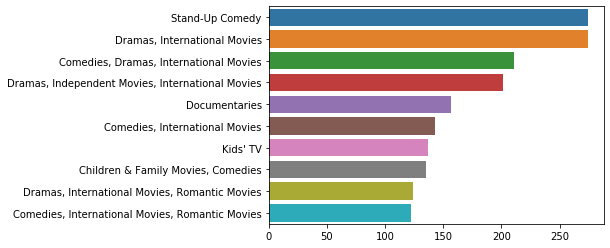

In [59]:
sns.barplot(x=genre.values,y=genre.index)

Text(0.5, 1.0, 'negara terbanyak')

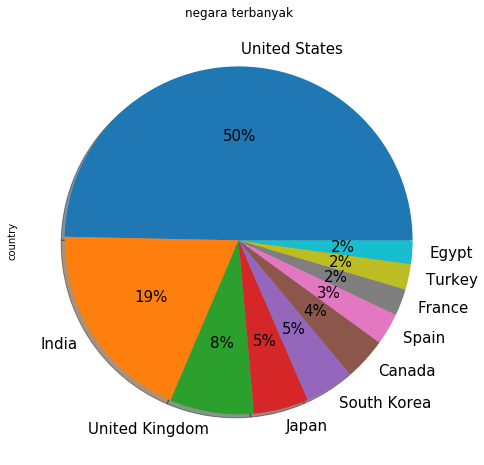

In [43]:
Country = datanetflix.groupby(datanetflix['country'])['country'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
Country.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("negara terbanyak")

In [42]:
negara= datanetflix['country'].value_counts().head(10)
negara

United States     1958
India              746
United Kingdom     308
Japan              201
South Korea        179
Canada             156
Spain              117
France              97
Turkey              94
Egypt               86
Name: country, dtype: int64

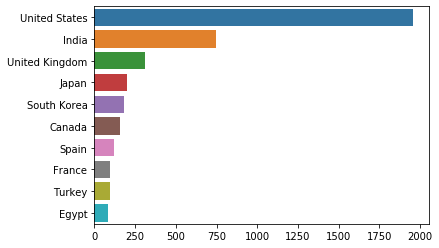

In [55]:
sns.barplot(x=negara.values,y=negara.index)

In [54]:
datanetflix.groupby('type').country.value_counts()['TV Show'][:10]

country
United States     548
United Kingdom    162
South Korea       145
Japan             143
Taiwan             61
India              57
Canada             52
Spain              40
Australia          38
China              36
Name: country, dtype: int64

In [56]:
datanetflix.groupby('type').country.value_counts()['Movie'][:10]

country
United States     1410
India              689
United Kingdom     146
Canada             104
Spain               77
Egypt               74
Philippines         70
Turkey              68
Indonesia           64
France              62
Name: country, dtype: int64

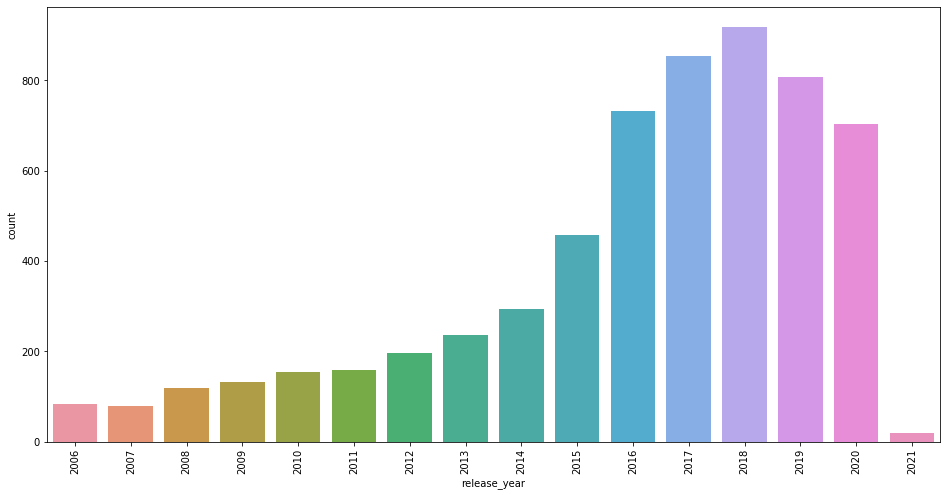

In [34]:
plt.figure(figsize=(16,8))
rating = sns.countplot(x = "release_year", data = datanetflix )
rating.set_xticklabels(rating.get_xticklabels(), rotation=90)
print()


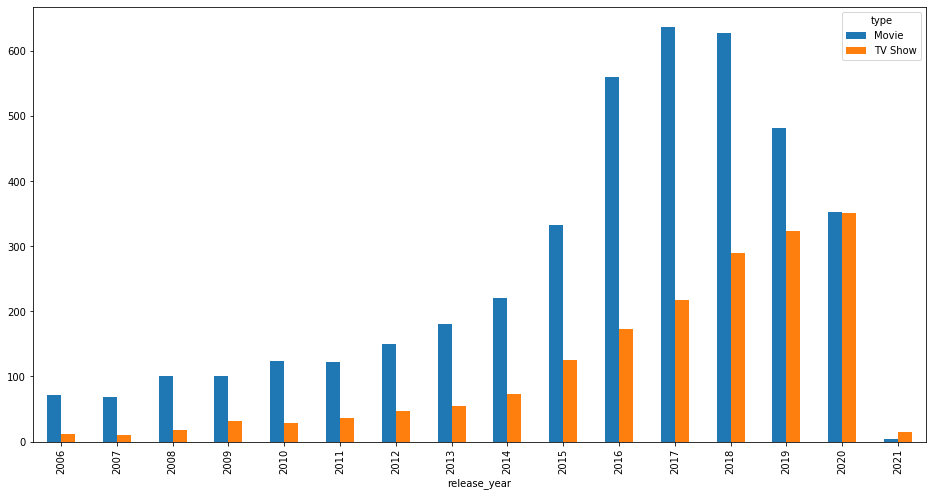

In [35]:
pd.crosstab(datanetflix.release_year, datanetflix.type).plot(kind='bar',figsize=(16,8))

In [36]:
#5 series yg baru rilis
datanetflix[datanetflix['type']=='TV Show'].sort_values('release_year').tail(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
4390,s4391,TV Show,Nailed It! Mexico,"Omar Chaparro, Anna Ruiz","Mexico, United States","January 5, 2021",2021,TV-PG,3 Seasons,"International TV Shows, Reality TV, Spanish-La...","The fun, fondant and hilarious cake fails head..."
1780,s1781,TV Show,Disenchantment,"Abbi Jacobson, Eric André, Nat Faxon, John DiM...",United States,"January 15, 2021",2021,TV-14,3 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","Princess duties call, but she'd rather be drin..."
4965,s4966,TV Show,Pretend It’s a City,Fran Lebowitz,United States,"January 8, 2021",2021,TV-14,1 Season,Docuseries,Wander the New York City streets and fascinati...
3822,s3823,TV Show,Lupin,"Omar Sy, Ludivine Sagnier, Clotilde Hesme, Nic...",United States,"January 8, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Inspired by the adventures of Arsène Lupin, ge..."
2672,s2673,TV Show,Headspace Guide to Meditation,Andy Puddicombe,United States,"January 1, 2021",2021,TV-G,1 Season,"Docuseries, Science & Nature TV","Headspace takes a friendly, animated look at t..."


In [37]:
#5 movie yg baru rilis
datanetflix[datanetflix['type']=='Movie'].sort_values('release_year').tail(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
3111,s3112,Movie,Jai Mummy Di,"Poonam Dhillon, Supriya Pathak, Sunny Singh, S...",India,"March 14, 2020",2020,TV-MA,101 min,"Comedies, International Movies, Romantic Movies",Sick of keeping their love a secret from their...
5859,s5860,Movie,Stuck Apart,"Engin Günaydın, Haluk Bilginer, Binnur Kaya, Ö...",Turkey,"January 8, 2021",2021,TV-MA,97 min,"Comedies, Dramas, International Movies","Entrenched in a midlife crisis, Aziz seeks sol..."
7551,s7552,Movie,What Happened to Mr. Cha?,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
1285,s1286,Movie,Charming,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands","January 8, 2021",2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."
7569,s7570,Movie,What Would Sophia Loren Do?,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."


In [71]:
netflix = pd.read_csv('Kelompok 4 Netflix Shows.csv')
netflix.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [72]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        5398 non-null object
cast            7069 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
rating          7780 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
description     7787 non-null object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [73]:
dnetflix= netflix.dropna()

In [75]:
dnetflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7783
Data columns (total 12 columns):
show_id         4808 non-null object
type            4808 non-null object
title           4808 non-null object
director        4808 non-null object
cast            4808 non-null object
country         4808 non-null object
date_added      4808 non-null object
release_year    4808 non-null int64
rating          4808 non-null object
duration        4808 non-null object
listed_in       4808 non-null object
description     4808 non-null object
dtypes: int64(1), object(11)
memory usage: 488.3+ KB


Text(0.5, 1.0, 'director terbanyak')

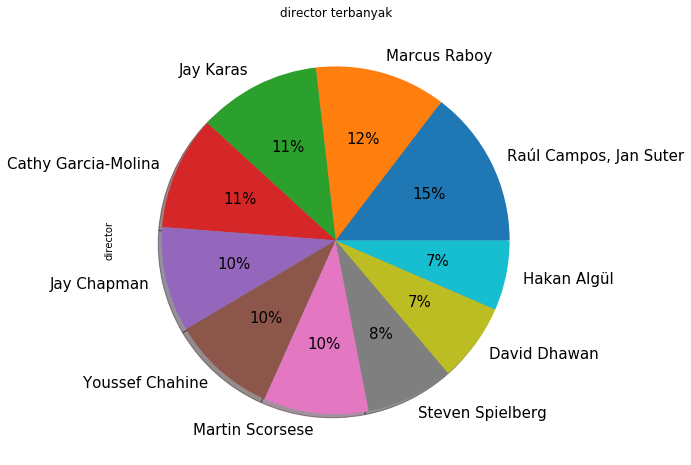

In [79]:
director = dnetflix.groupby(dnetflix['director'])['director'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
director.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("director terbanyak")

In [80]:
drc= dnetflix['director'].value_counts().head(10)
drc

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: director, dtype: int64

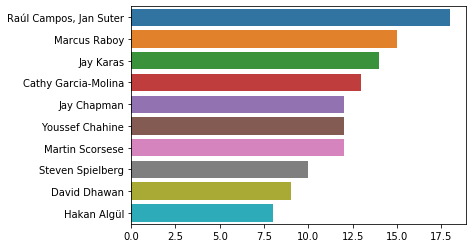

In [81]:
sns.barplot(x=drc.values,y=drc.index)

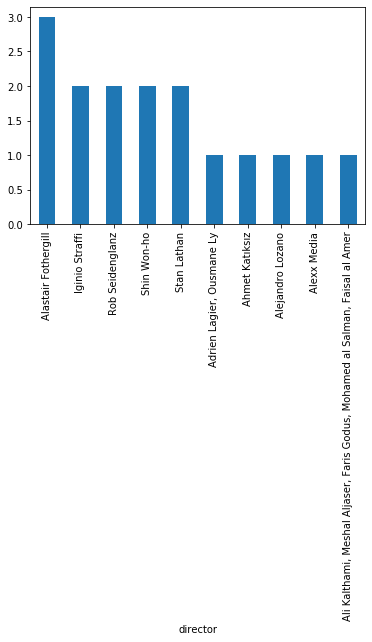

In [77]:
dnetflix.groupby('type').director.value_counts()['TV Show'][:10].plot(kind='bar')

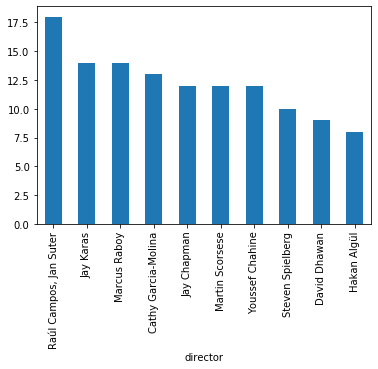

In [76]:
dnetflix.groupby('type').director.value_counts()['Movie'][:10].plot(kind='bar')